<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
    Importing Libraries and Data
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import plotly.subplots as sp

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv(r'DailyDelhiClimateTrain.csv')
test=pd.read_csv(r'DailyDelhiClimateTest.csv')


In [3]:
train.shape

(1462, 5)

In [4]:
train.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [5]:
train.describe()

meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

In [6]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
    Data preprocessing 

</div>
 

In [7]:
# Convert the 'date' column to datetime format
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')

# Set the 'date' column as the index
train.set_index(train['date'], inplace=True)


# Drop the original 'date' column
df = train.drop(columns=['date'])

df.head()


meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [8]:
# Convert the 'date' column to datetime format
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

# Set the 'date' column as the index
test.set_index(test['date'], inplace=True)


# Drop the original 'date' column
test = test.drop(columns=['date'])

test.head()


meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [10]:
df.isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [11]:
df.duplicated().any() 

False

<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Exploratory Data Analysis

</div>
 

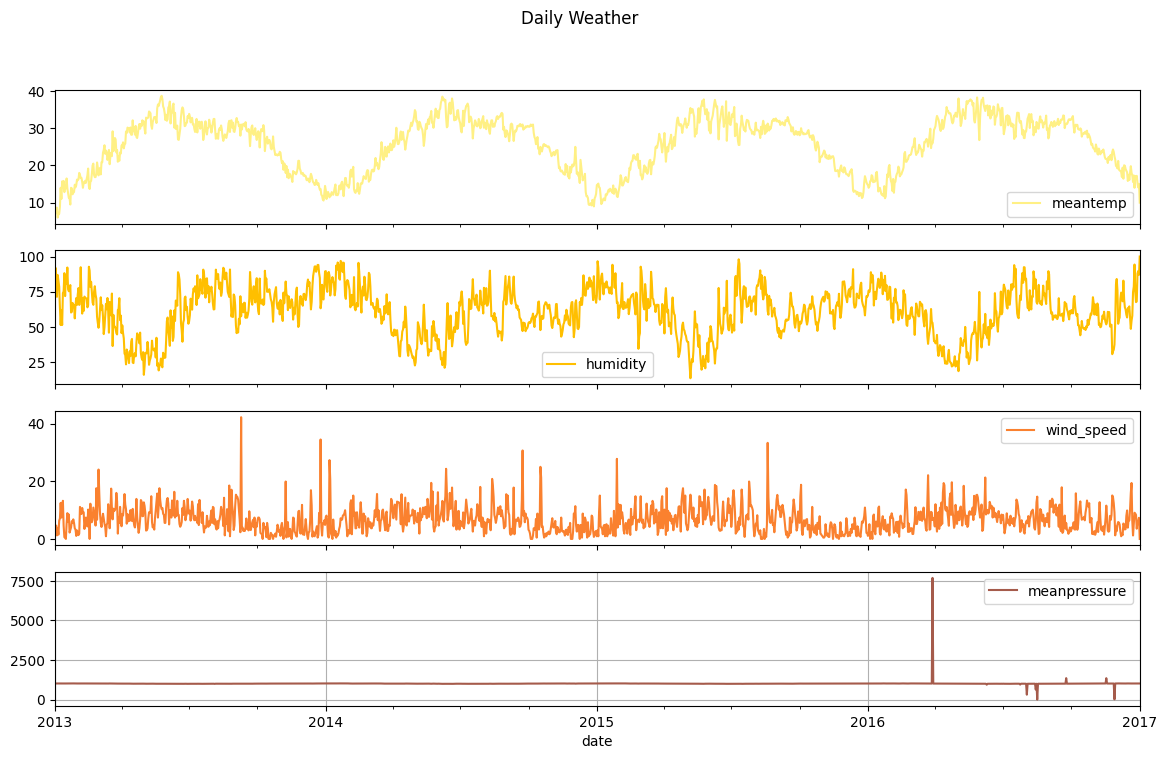

In [12]:
df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].plot(
    figsize=(14, 8), 
    subplots=True, 
    title="Daily Weather", 
    color= ['#FFF085', '#FFBF00' , '#FA812F', '#A55B4B']
)
plt.grid(True)
plt.show()


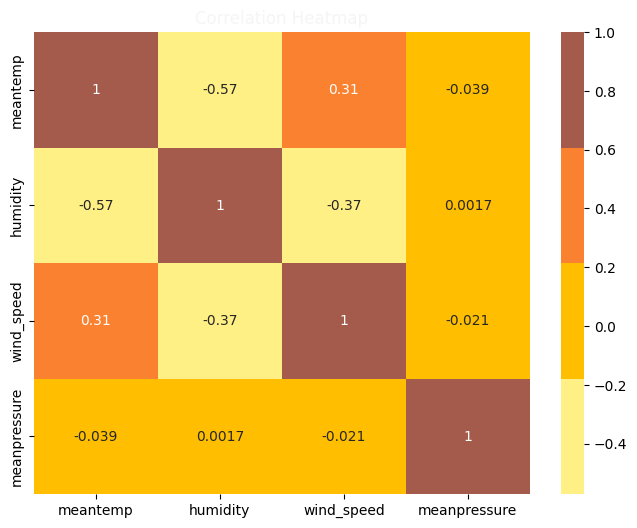

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Define custom colormap
custom_cmap = ListedColormap( ['#FFF085', '#FFBF00' , '#FA812F', '#A55B4B'])   # ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

plt.figure(figsize=(8,6))
sns.heatmap(
    df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']].corr(),
    annot=True,
    cmap=custom_cmap
)
plt.title('Correlation Heatmap', color='#F6F5F5')
plt.show()


In [14]:
fig = go.Figure()

# meantemp   
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                         mode='lines', name='Mean Temp',
                         line=dict(color='#FFF085')))

# humidity
fig.add_trace(go.Scatter(x=df.index, y=df['humidity'],
                         mode='lines', name='Humidity',
                         line=dict(color='#FA812F')))                # ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']


# wind_speed
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed'],
                         mode='lines', name='Wind Speed',
                         line=dict(color='#A55B4B')))

# meanpressure
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure'],
                         mode='lines', name='Mean Pressure',
                         line=dict(color='#FFBF00')))

fig.update_layout(title='Time Series Plots',
                  xaxis_title='Date',
                  yaxis_title='Value',
                  plot_bgcolor='#FBF6E9')

fig.show()


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   detect outliers

</div>
 


In [15]:
# create box  plot for each column
fig = go.Figure()

# specify the columns to plot
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
colors = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

for col, color in zip(columns, colors):
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=color))

fig.update_layout(
    title="Boxplot for Weather Data",
    yaxis_title="Value",
    boxmode="group",
    plot_bgcolor='#FBF6E9'
)


#  Display the interactive plot
fig.show()


In [16]:
# Define outliers for each column
# For wind speed
W_Q1 = df['wind_speed'].quantile(0.25)
W_Q3 = df['wind_speed'].quantile(0.75)
W_IQR = W_Q3 - W_Q1


wind_outliers= df[df['wind_speed'] > (W_Q3 + 1.5 * W_IQR)]

out_values=(W_Q3 + 1.5 * W_IQR)
print("Outlier values for wind speed > ", out_values)

#For mean pressure  
M_Q1 = df['meanpressure'].quantile(0.25)
M_Q3 = df['meanpressure'].quantile(0.75)
M_IQR = M_Q3 - M_Q1

pressure_outliers = df[(df['meanpressure'] > (M_Q3 + 1.5 * M_IQR))| (df['meanpressure'] < (M_Q1 - 1.5 * M_IQR))]
out_values2=(M_Q3 + 1.5 * M_IQR)
out_values3=(M_Q1 - 1.5 * M_IQR)
print("Outlier values for mean pressure < ", out_values3 , "And" " > ", out_values2)

#For humidity
H_Q1 = df['humidity'].quantile(0.25)
H_Q3 = df['humidity'].quantile(0.75)
H_IQR = H_Q3 - H_Q1

humidity_outliers = df[(df['humidity'] < (H_Q1 - 1.5 * H_IQR))]
out_values4=(H_Q1 - 1.5 * H_IQR)
print("Outlier values for humidity < ", out_values4)
 
print("_____________________________________________________________")

print("Number of outliers in wind speed: ", wind_outliers.shape[0])
print("Number of outliers in mean pressure: ", pressure_outliers.shape[0])
print("Number of outliers in humidity: ", humidity_outliers.shape[0])


Outlier values for wind speed >  17.883088235294117
Outlier values for mean pressure <  981.5335408834585 And >  1034.991717575188
Outlier values for humidity <  17.609375
_____________________________________________________________
Number of outliers in wind speed:  30
Number of outliers in mean pressure:  9
Number of outliers in humidity:  2



<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Remove outliers
</div>
 


In [17]:
df.drop(pressure_outliers.index, inplace=True)
df.drop(humidity_outliers.index, inplace=True)

median_wind = df['wind_speed'].median()
df.loc[df['wind_speed'] > (W_Q3 + 1.5 * W_IQR), 'wind_speed'] = median_wind


In [18]:
# create box  plot for each column
fig = go.Figure()

# specify the columns to plot
columns = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
colors = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']

for col, color in zip(columns, colors):
    fig.add_trace(go.Box(y=df[col], name=col, marker_color=color))

fig.update_layout(
    title="Boxplot for Weather Data ِAfter Outlier Removal",
    yaxis_title="Value",
    boxmode="group",
    plot_bgcolor='#FFFDF6'
)


#  Display the interactive plot
fig.show()


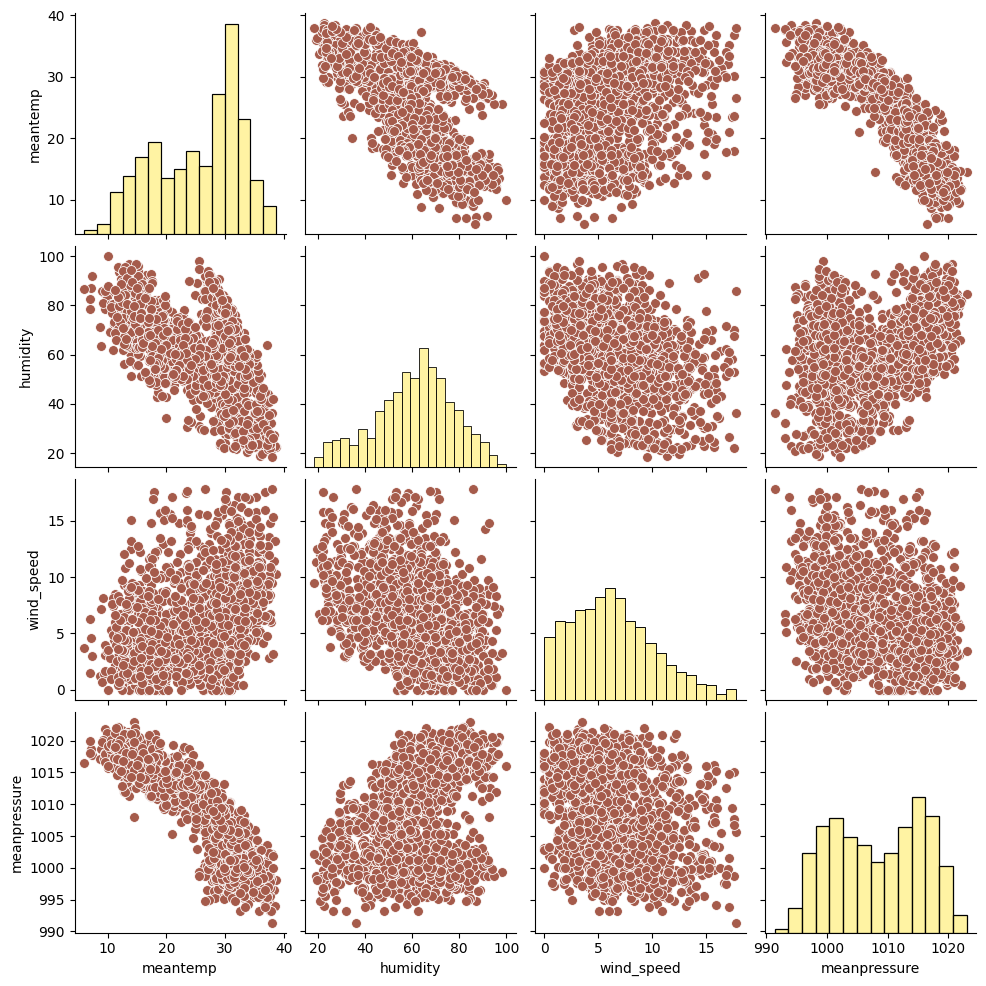

In [19]:

custom_palette = ['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']
# Pairplot  
sns.pairplot(df[['meantemp', 'humidity', 'wind_speed', 'meanpressure']],
             plot_kws={'color': custom_palette[2], 's': 50},
             diag_kws={'color': custom_palette[0], 'fill': True})


plt.show()



<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 15px; text-align: center; font-size: 25px;">
   Stationary Test
</div>


### ➤ Mean_Temperature

In [20]:
# ADFULLER TEST
MT_result = adfuller(df['meantemp'])
print(MT_result[1])  # p-value
print("Stationary ?" , MT_result[1] < 0.05)  # p-value < 0.05 indicates stationarity


0.2783180980810638
Stationary ? False


In [21]:
MT_result = adfuller(df['meantemp'].diff().dropna())
print(MT_result[1])  # p-value
print("Stationary ?" , MT_result[1] < 0.05)  # p-value < 0.05 indicates stationarity

4.0732593710834914e-29
Stationary ? True


### ➤ Humidity

In [22]:
# ADFULLER TEST
H_result = adfuller(df['humidity'])
print(H_result[1])  # p-value
print("Stationary ?" , H_result[1] < 0.05)  # p-value < 0.05 indicates stationarity


0.0037651323240412127
Stationary ? True


### ➤ Wind_Speed

In [23]:
WS_result = adfuller(df['wind_speed'])
print(WS_result[1])  # p-value
print("Stationary ?" , WS_result[1] < 0.05)  # p-value < 0.05 indicates stationarity

0.0013304610419728696
Stationary ? True


### ➤ Mean_pressure

In [24]:
MP_result = adfuller(df['meanpressure'])
print(MP_result[1])  # p-value
print("Stationary ?" , MP_result[1] < 0.05)  # p-value < 0.05 indicates stationarity

0.23248766663792525
Stationary ? False


In [25]:
MP_result = adfuller(df['meanpressure'].diff().dropna())
print(MP_result[1])  # p-value
print("Stationary ?" , MP_result[1] < 0.05)  # p-value < 0.05 indicates stationarity

1.3773863408186966e-29
Stationary ? True


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   seasonality
</div>


In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

def seasonal_decomposition_custom(df, column, model='additive', figsize=(15, 8)):
    result = seasonal_decompose(df[column], model=model, period=30)

    fig = plt.figure(figsize=figsize)

    # Original
    ax1 = plt.subplot(411)                                                                  #['#FFF085', '#FA812F' , '#A55B4B', '#FFBF00']
    ax1.plot(df.index, result.observed, color='#FFF085')
    ax1.set_title('Original', color='#FFF085')
    #ax1.grid(True, color='#bab87b')
    #ax1.set_facecolor('#FAF1E6')

    # Trend
    ax2 = plt.subplot(412)
    ax2.plot(df.index, result.trend, color='#FA812F')
    ax2.set_title('Trend', color='#FA812F')
    ax2.grid(True, color='#bab87b')
    ax2.set_facecolor('#FAF1E6')

    # Seasonal
    ax3 = plt.subplot(413)
    ax3.plot(df.index, result.seasonal, color='#A55B4B')
    ax3.set_title('Seasonal', color='#A55B4B')
    ax3.grid(True, color='#bab87b')
    ax3.set_facecolor('#FAF1E6')

    # Residual
    ax4 = plt.subplot(414)
    ax4.plot(df.index, result.resid, color='#FFBF00')
    ax4.set_title('Residual', color='#FFBF00')
    ax4.grid(True, color='#bab87b')
    ax4.set_facecolor('#FAF1E6')

    plt.tight_layout()
    plt.show()



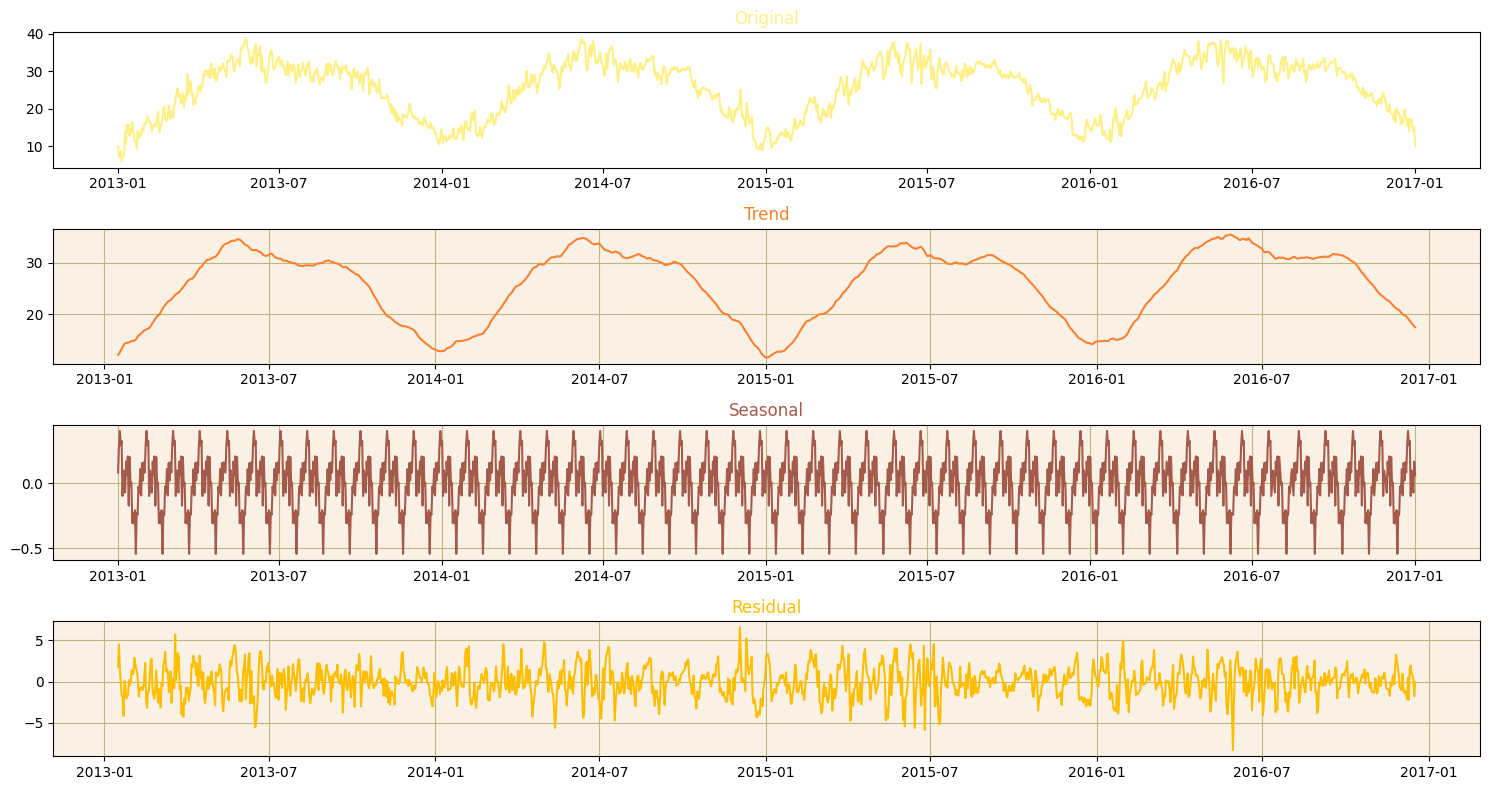

In [27]:
seasonal_decomposition_custom(df, 'meantemp', model='additive', figsize=(15, 8))

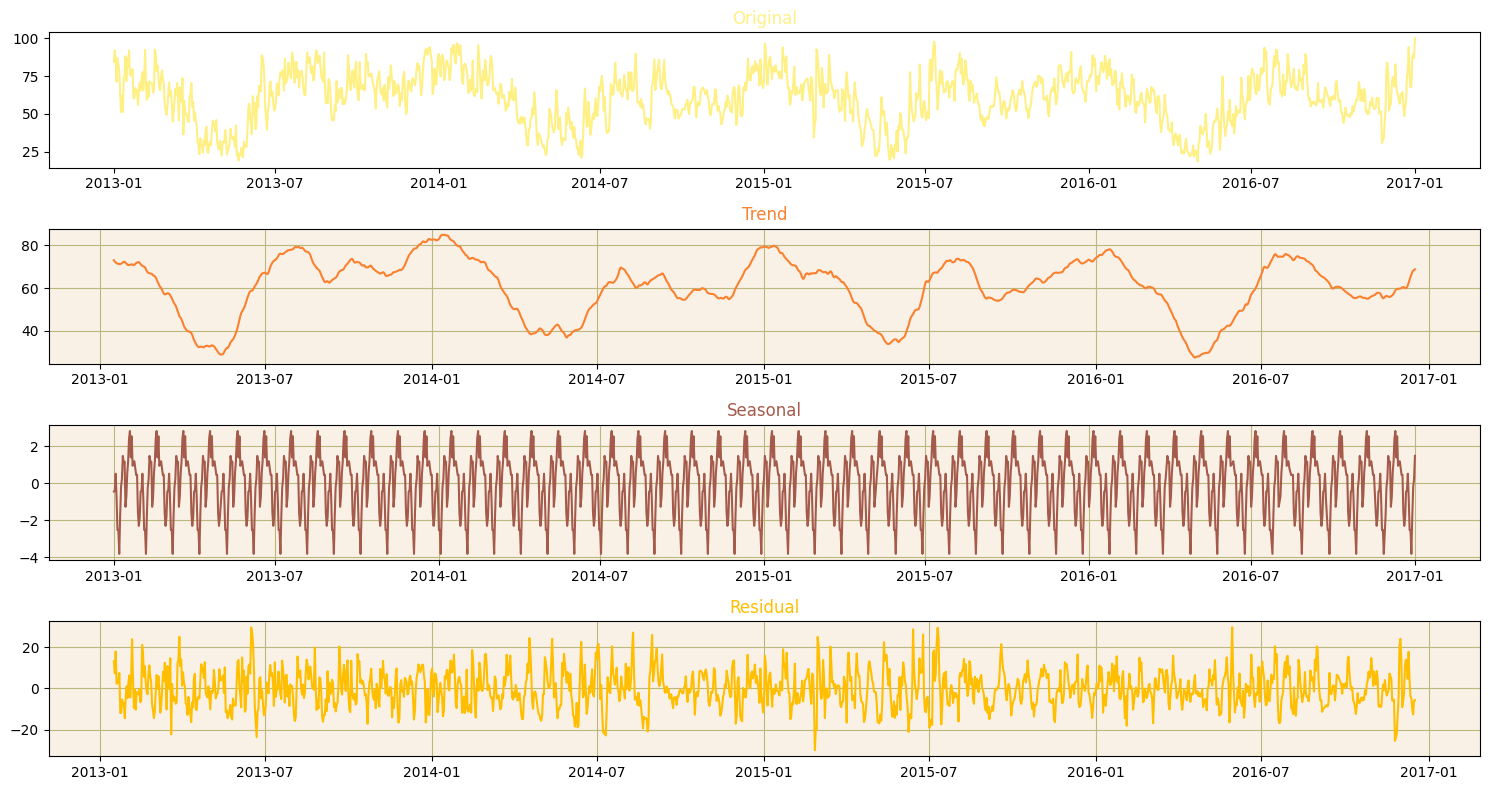

In [28]:
seasonal_decomposition_custom(df, 'humidity', model='additive', figsize=(15, 8))

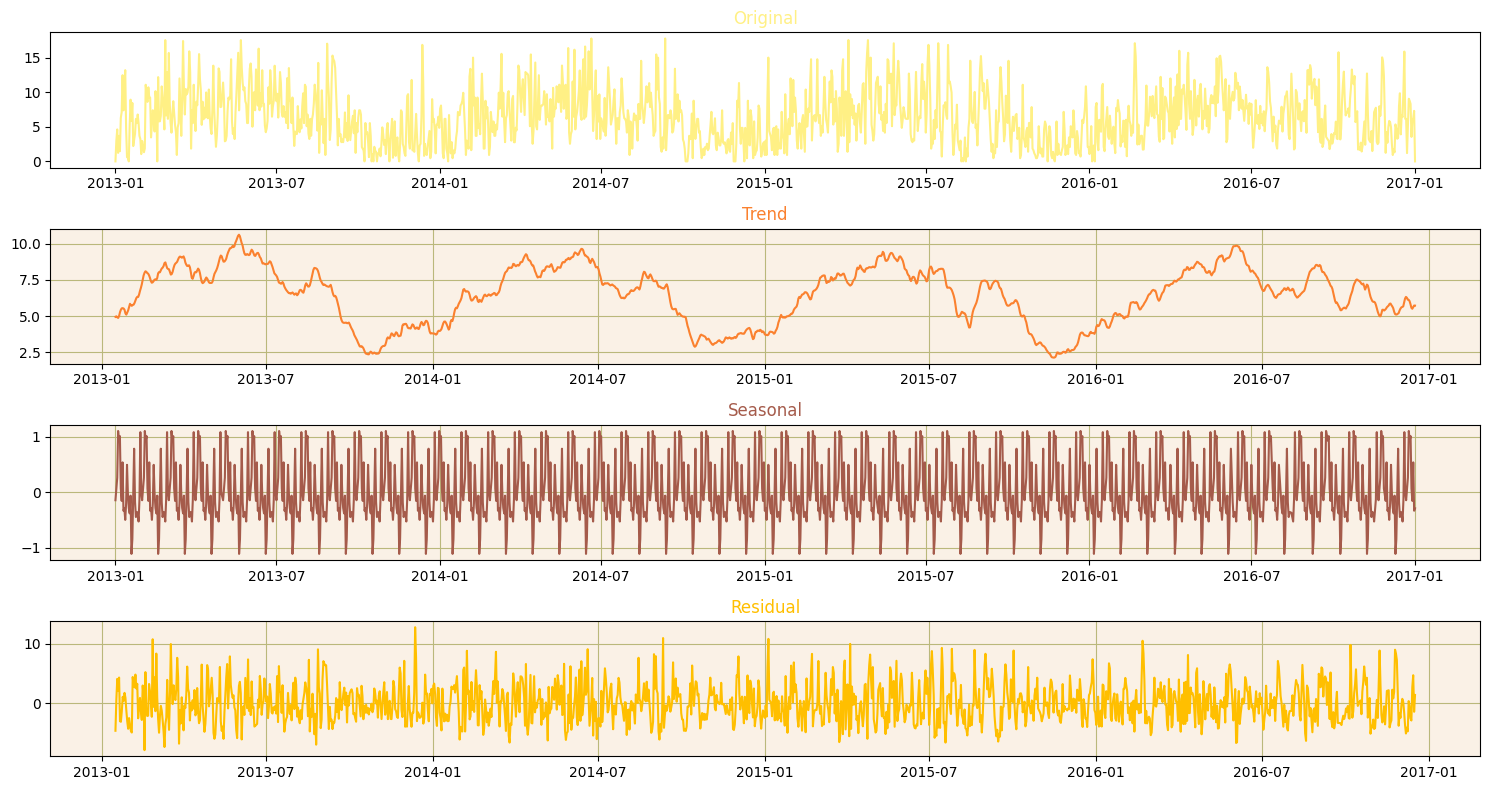

In [29]:
seasonal_decomposition_custom(df, 'wind_speed', model='additive', figsize=(15, 8))

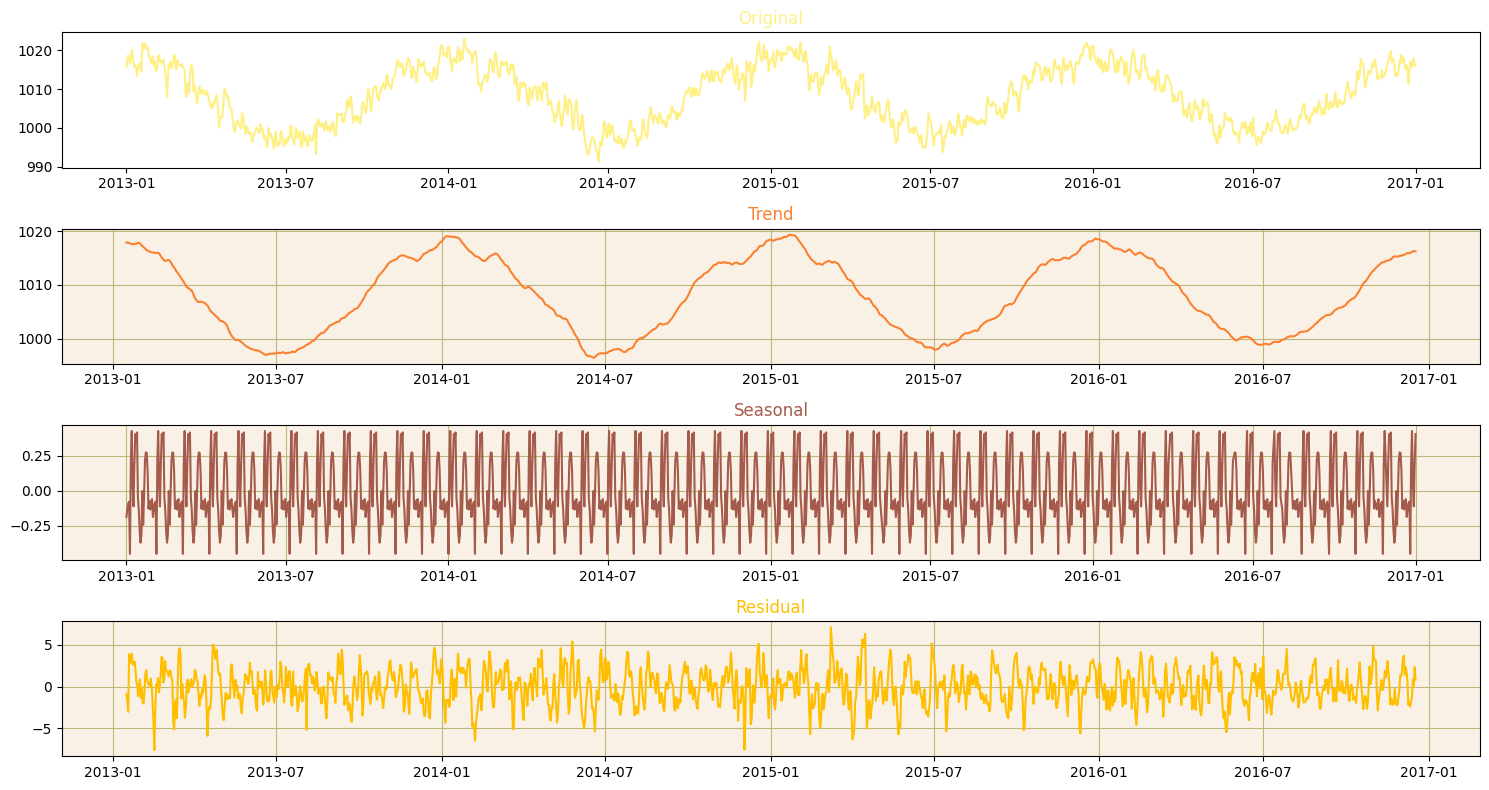

In [30]:
seasonal_decomposition_custom(df, 'meanpressure', model='additive', figsize=(15, 8))

<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 30px;">
   (ACF)&(PACF)
</div>


### ➤ Mean_Temperature

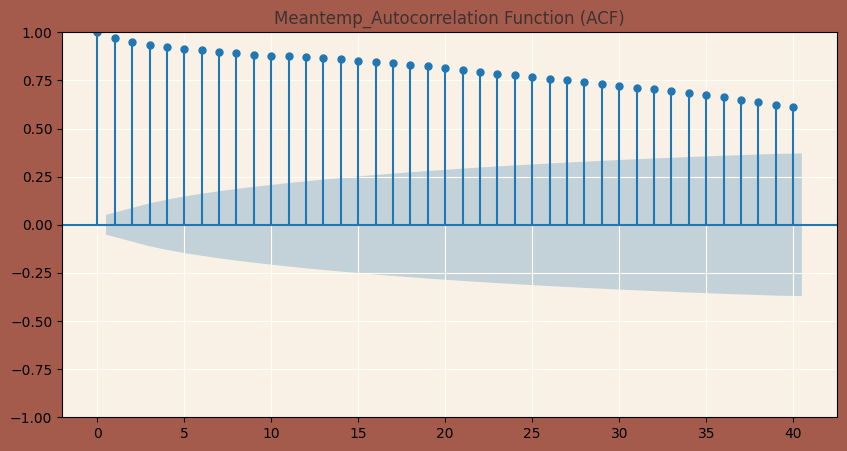

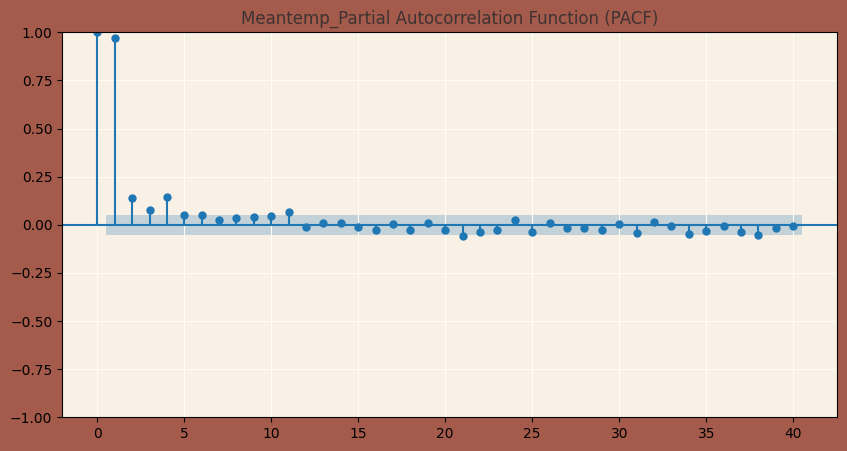

In [31]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
x=plot_acf(df['meantemp'], lags=40, ax=ax)


    
ax.set_title('Meantemp_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meantemp'], lags=40, ax=ax, method='ywm')
ax.set_title('Meantemp_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Humiditiy

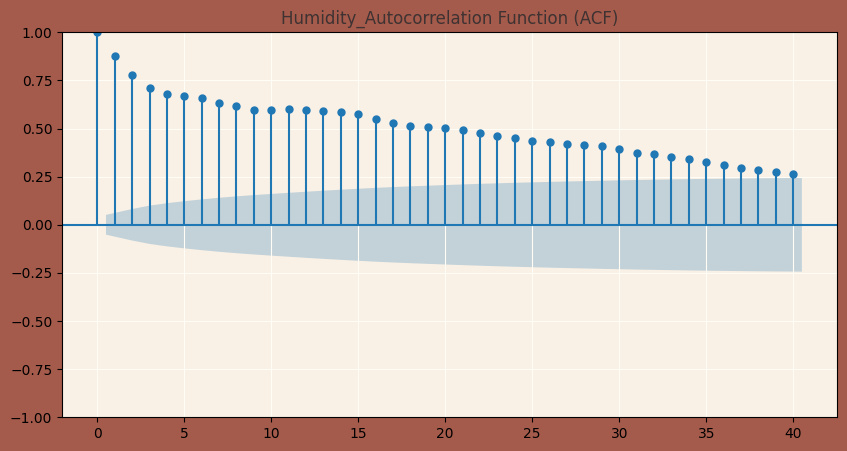

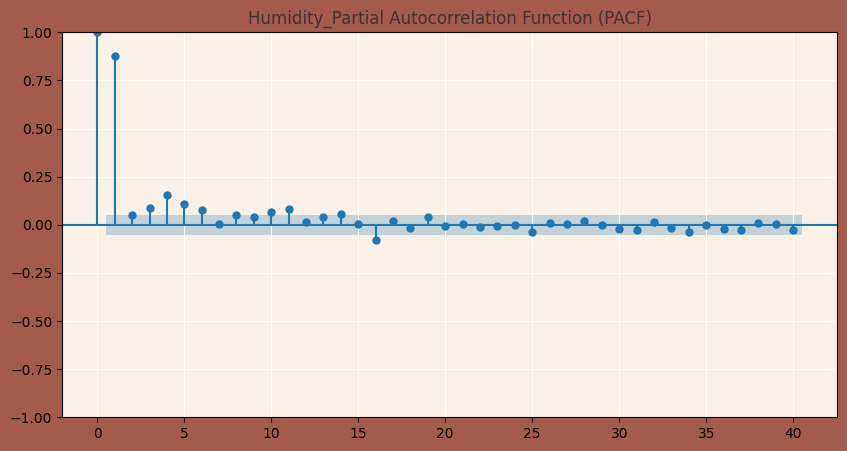

In [32]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['humidity'], lags=40, ax=ax)
ax.set_title('Humidity_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['humidity'], lags=40, ax=ax, method='ywm')
ax.set_title('Humidity_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Wind_Speed

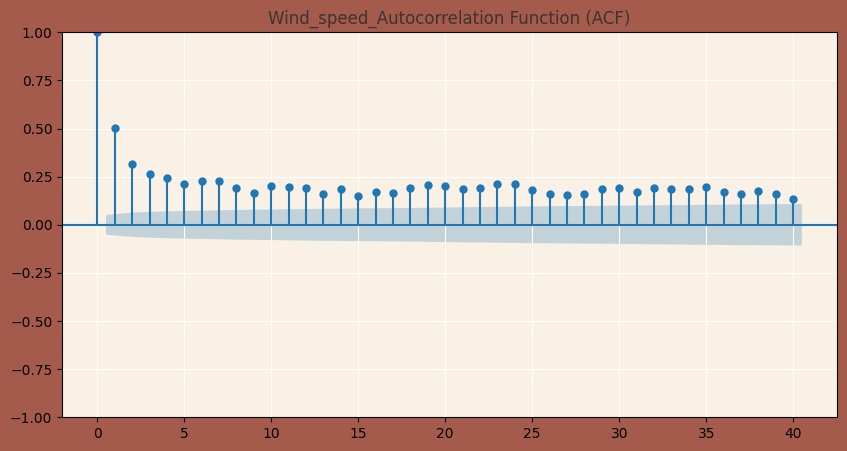

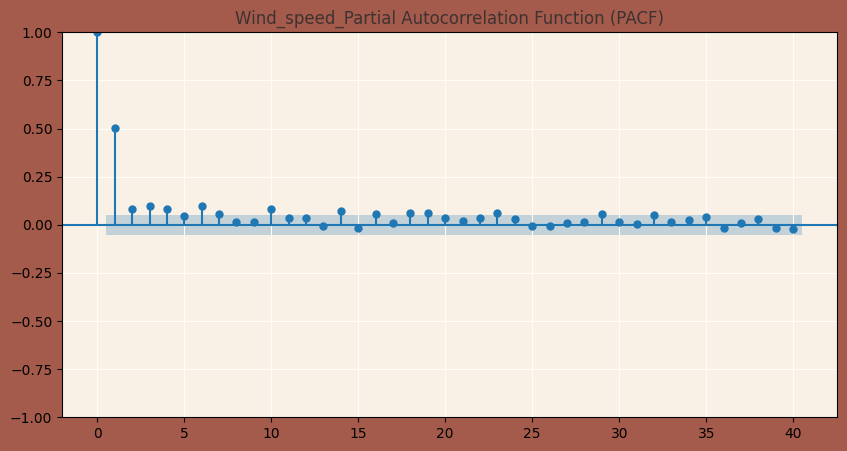

In [33]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['wind_speed'], lags=40, ax=ax)
ax.set_title('Wind_speed_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['wind_speed'], lags=40, ax=ax, method='ywm')
ax.set_title('Wind_speed_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

### ➤ Mean_pressure

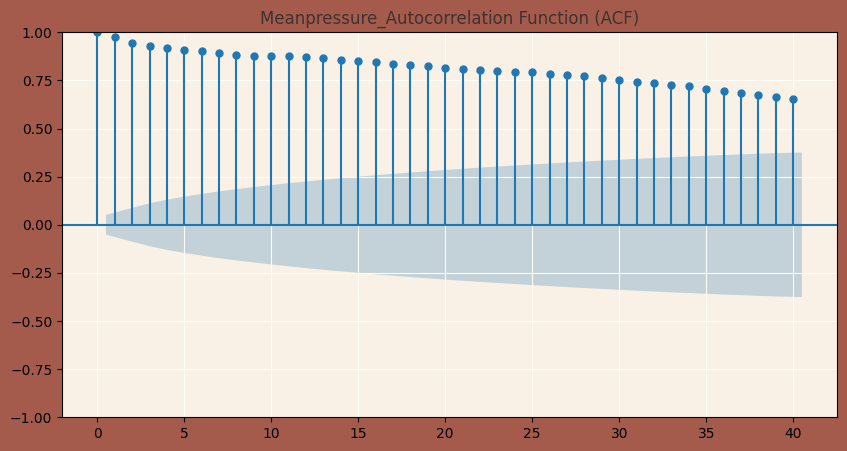

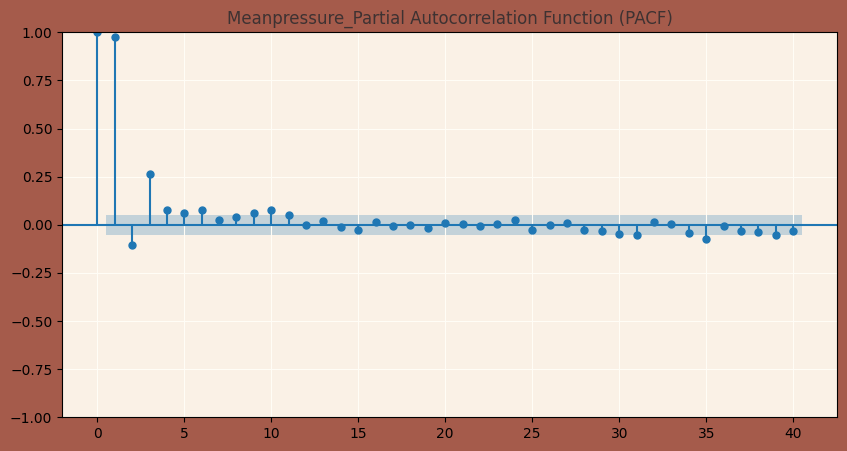

In [34]:
# ACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(df['meanpressure'], lags=40, ax=ax)
ax.set_title('Meanpressure_Autocorrelation Function (ACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()

# PACF Plot
fig, ax = plt.subplots(figsize=(10, 5))
plot_pacf(df['meanpressure'], lags=40, ax=ax, method='ywm')
ax.set_title('Meanpressure_Partial Autocorrelation Function (PACF)', color='#3E3232')
ax.set_facecolor('#FAF1E6')
fig.patch.set_facecolor('#A55B4B')
plt.grid(color='#FFFDF6')
plt.show()


<div style="border-radius: 50px; background: #A55B4B; color: white; padding: 10px; text-align: center; font-size: 25px;">
   Trends
</div>



In [35]:
"""
Visualizes multiple time series variables with their 30-day moving averages using Plotly subplots.

For each variable:
- Plots the original time series line.
- Overlays its 30-day moving average as a dashed line.

Purpose:
- To explore long-term trends versus daily fluctuations.
- Identify outliers and anomalies.
- Highlight smoothing effects of moving averages.

"""



df['meantemp_MA'] = df['meantemp'].rolling(window=30).mean()
df['humidity_MA'] = df['humidity'].rolling(window=30).mean()
df['wind_speed_MA'] = df['wind_speed'].rolling(window=30).mean()
df['meanpressure_MA'] = df['meanpressure'].rolling(window=30).mean()


fig = sp.make_subplots(rows=4, cols=1,
                       subplot_titles=('Mean Temp', 'Humidity', 'Wind Speed', 'Mean Pressure'),
                       shared_xaxes=True)

# Mean Temp  
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp'],
                         mode='lines', name='Mean Temp',
                         line=dict(color='#A55B4B')),
              row=1, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['meantemp_MA'],
                         mode='lines', name='Mean Temp MA',
                         line=dict(color='#FFF085', dash='dash')),
              row=1, col=1)

# Humidity  
fig.add_trace(go.Scatter(x=df.index, y=df['humidity'],
                         mode='lines', name='Humidity',
                         line=dict(color='#FFF085')),
              row=2, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['humidity_MA'],
                         mode='lines', name='Humidity MA',
                         line=dict(color='#A55B4B', dash='dash')),
              row=2, col=1)

# Wind Speed  
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed'],
                         mode='lines', name='Wind Speed',
                         line=dict(color='#FA812F')),
              row=3, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['wind_speed_MA'],
                         mode='lines', name='Wind Speed MA',
                         line=dict(color='#A55B4B', dash='dash')),
              row=3, col=1)

# Mean Pressure  
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure'],
                         mode='lines', name='Mean Pressure',
                         line=dict(color='#FFBF00')),
              row=4, col=1)
fig.add_trace(go.Scatter(x=df.index, y=df['meanpressure_MA'],
                         mode='lines', name='Mean Pressure MA',
                         line=dict(color='#FA812F', dash='dash')),
              row=4, col=1)

# Layout
fig.update_layout(height=1200, width=900, 
                  title_text='Time Series with 30-Day Moving Average ',
                  plot_bgcolor='#f6ece1')

fig.show()


**Model**

In [ ]:
df.isna().sum()

meantemp            0
humidity            0
wind_speed          0
meanpressure        0
meantemp_MA        29
humidity_MA        29
wind_speed_MA      29
meanpressure_MA    29
dtype: int64

In [37]:
df.dropna(subset=['meantemp', 'meanpressure'], inplace=True)


In [38]:
df.isna().sum()

meantemp            0
humidity            0
wind_speed          0
meanpressure        0
meantemp_MA        29
humidity_MA        29
wind_speed_MA      29
meanpressure_MA    29
dtype: int64

In [39]:
r=adfuller(df['meantemp'])
print(r[1])

0.2783180980810638


In [40]:
p=adfuller(df['meanpressure'])
print(p[1])

0.23248766663792525


In [41]:
x=adfuller(df['humidity'])
print(x[1])

0.0037651323240412127


In [42]:
n=adfuller(df['wind_speed'])
print(n[1])

0.0013304610419728696


**Prophet Model**

12:40:03 - cmdstanpy - INFO - Chain [1] start processing
12:40:03 - cmdstanpy - INFO - Chain [1] done processing


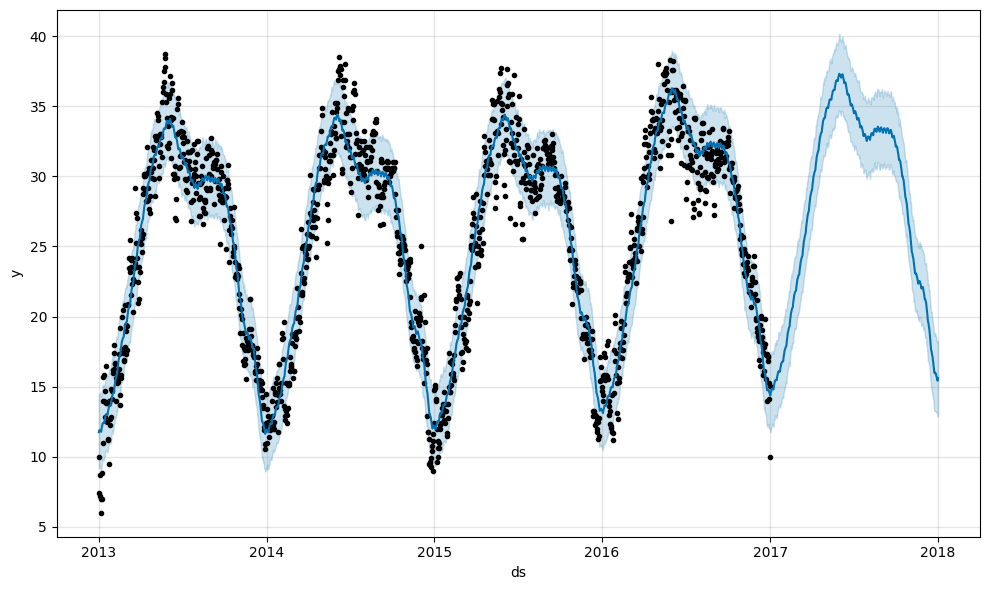

In [43]:
from prophet import Prophet


prophet_df = train[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})


model = Prophet()
model.fit(prophet_df)

# --- Create future DataFrame with 365 days ahead ---
future = model.make_future_dataframe(periods=365)


forecast = model.predict(future)


fig = model.plot(forecast)
plt.show()


**Tempreture**

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

prophet_df = train[['date', 'meantemp']].rename(columns={'date': 'ds', 'meantemp': 'y'})

model = Prophet()
model.fit(prophet_df)

test_reset = test.reset_index()
test_df = test_reset[['date']].rename(columns={'date': 'ds'})

forecast = model.predict(test_df)
forecast


12:40:04 - cmdstanpy - INFO - Chain [1] start processing
12:40:04 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2017-01-01  27.531065   11.779680   17.069190    27.531065    27.531065   
1   2017-01-02  27.533981   11.928558   17.004882    27.533981    27.533981   
2   2017-01-03  27.536897   12.080209   17.326101    27.536897    27.536897   
3   2017-01-04  27.539812   12.202077   17.491888    27.539812    27.539812   
4   2017-01-05  27.542728   12.240204   17.288487    27.542728    27.542728   
..         ...        ...         ...         ...          ...          ...   
109 2017-04-20  27.848889   30.152016   35.374156    27.766468    27.936836   
110 2017-04-21  27.851805   30.394332   35.853557    27.768207    27.941510   
111 2017-04-22  27.854720   30.534761   35.593250    27.769052    27.945560   
112 2017-04-23  27.857636   30.634283   35.817771    27.772202    27.949520   
113 2017-04-24  27.860552   30.691001   36.169717    27.773762    27.953723   

     additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0        -13.168318            -13.168318            -13.168318 -0.195063   
1        -12.960709            -12.960709            -12.960709 -0.010844   
2        -12.877177            -12.877177            -12.877177  0.034058   
3        -12.713036            -12.713036            -12.713036  0.146275   
4        -12.728918            -12.728918            -12.728918  0.067163   
..              ...                   ...                   ...       ...   
109        5.042122              5.042122              5.042122  0.067163   
110        5.183022              5.183022              5.183022  0.027535   
111        5.261744              5.261744              5.261744 -0.069124   
112        5.305421              5.305421              5.305421 -0.195063   
113        5.652942              5.652942              5.652942 -0.010844   

     weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0       -0.195063     -0.195063 -12.973255    -12.973255    -12.973255   
1       -0.010844     -0.010844 -12.949865    -12.949865    -12.949865   
2        0.034058      0.034058 -12.911235    -12.911235    -12.911235   
3        0.146275      0.146275 -12.859310    -12.859310    -12.859310   
4        0.067163      0.067163 -12.796081    -12.796081    -12.796081   
..            ...           ...        ...           ...           ...   
109      0.067163      0.067163   4.974959      4.974959      4.974959   
110      0.027535      0.027535   5.155487      5.155487      5.155487   
111     -0.069124     -0.069124   5.330868      5.330868      5.330868   
112     -0.195063     -0.195063   5.500484      5.500484      5.500484   
113     -0.010844     -0.010844   5.663787      5.663787      5.663787   

     multiplicative_terms  multiplicative_terms_lower  \
0                     0.0                         0.0   
1                     0.0                         0.0   
2                     0.0                         0.0   
3                     0.0                         0.0   
4                     0.0                         0.0   
..                    ...                         ...   
109                   0.0                         0.0   
110                   0.0                         0.0   
111                   0.0                         0.0   
112                   0.0                         0.0   
113                   0.0                         0.0   

     multiplicative_terms_upper       yhat  
0                           0.0  14.362747  
1                           0.0  14.573271  
2                           0.0  14.659719  
3                           0.0  14.826777  
4                           0.0  14.813811  
..                          ...        ...  
109                         0.0  32.891011  
110                         0.0  33.034827  
111                         0.0  33.116465  
112                         0.0  33.163058  
113                         0.0  33.513494  

[114 rows x 19 columns]

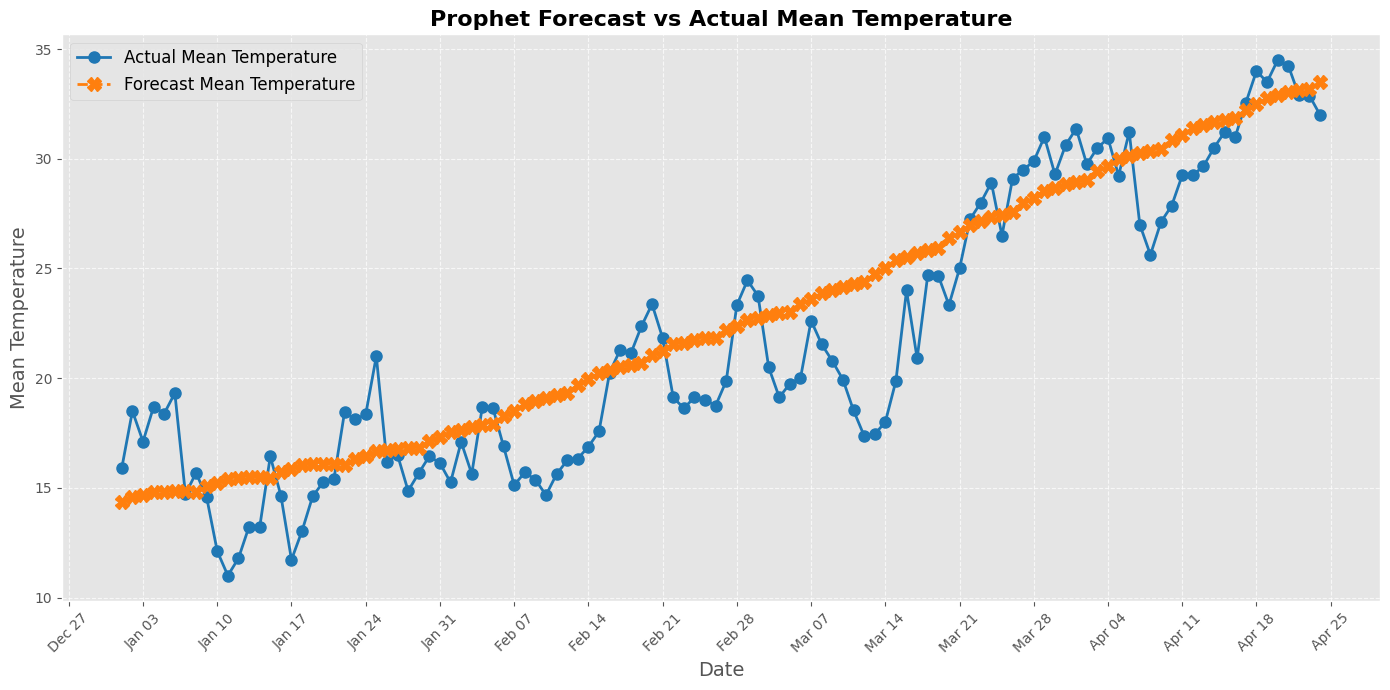

In [45]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
comparison_df = test_reset[['date', 'meantemp']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')

plt.style.use('ggplot')

plt.figure(figsize=(14, 7))

plt.plot(comparison_df['ds'], comparison_df['meantemp'], label='Actual Mean Temperature',
         marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Forecast Mean Temperature',
         marker='X', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))

plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Temperature', fontsize=14)
plt.title('Prophet Forecast vs Actual Mean Temperature', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [46]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Prepare and merge forecast
comparison_df = test_reset[['date', 'meantemp']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')

# Calculate MAPE and RMSE
comparison_df = comparison_df.rename(columns={'meantemp': 'y'})
mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat']) * 100
rmse = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")




MAPE: 11.65%
RMSE: 2.67


**Humidity**

12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing


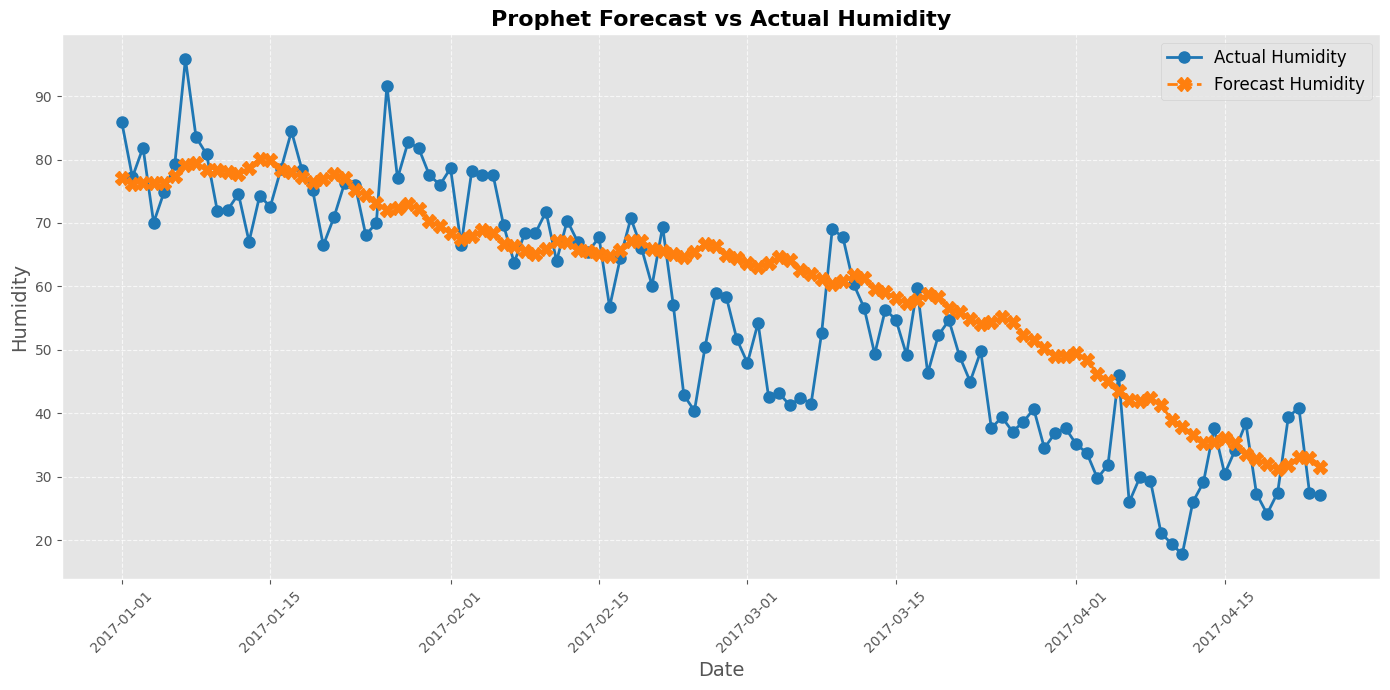

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

prophet_df = train[['date', 'humidity']].rename(columns={'date': 'ds', 'humidity': 'y'})

model = Prophet()
model.fit(prophet_df)

test_reset = test.reset_index()
test_df = test_reset[['date']].rename(columns={'date': 'ds'})

forecast = model.predict(test_df)

comparison_df = test_reset[['date', 'humidity']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')

# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

plt.plot(comparison_df['ds'], comparison_df['humidity'], label='Actual Humidity',
         marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Forecast Humidity',
         marker='X', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Humidity', fontsize=14)
plt.title('Prophet Forecast vs Actual Humidity', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np



comparison_df = test_reset[['date', 'humidity']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')
comparison_df = comparison_df.rename(columns={'humidity': 'y'})

# Calculate metrics
mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat']) * 100
rmse = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")



MAPE: 19.72%
RMSE: 10.32


In [49]:
# import pickle

# with open('model.pkl', 'wb') as f:
#     pickle.dump(model, f)


**Mean Pressure**

12:40:05 - cmdstanpy - INFO - Chain [1] start processing
12:40:05 - cmdstanpy - INFO - Chain [1] done processing


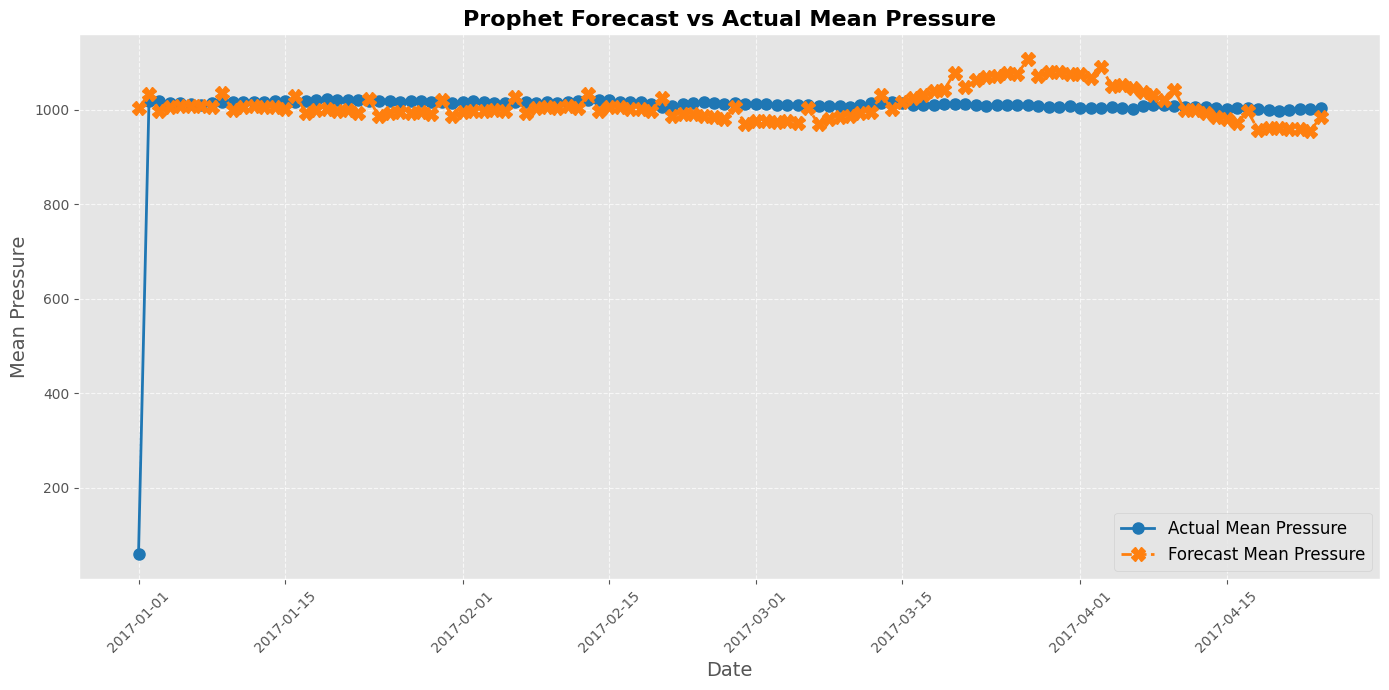

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

prophet_df = train[['date', 'meanpressure']].rename(columns={'date': 'ds', 'meanpressure': 'y'})

# Fit the model
model = Prophet()
model.fit(prophet_df)

test_reset = test.reset_index()
test_df = test_reset[['date']].rename(columns={'date': 'ds'})

forecast = model.predict(test_df)
comparison_df = test_reset[['date', 'meanpressure']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')

# Plotting
plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

plt.plot(comparison_df['ds'], comparison_df['meanpressure'], label='Actual Mean Pressure',
         marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Forecast Mean Pressure',
         marker='X', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Mean Pressure', fontsize=14)
plt.title('Prophet Forecast vs Actual Mean Pressure', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


12:40:06 - cmdstanpy - INFO - Chain [1] start processing
12:40:06 - cmdstanpy - INFO - Chain [1] done processing


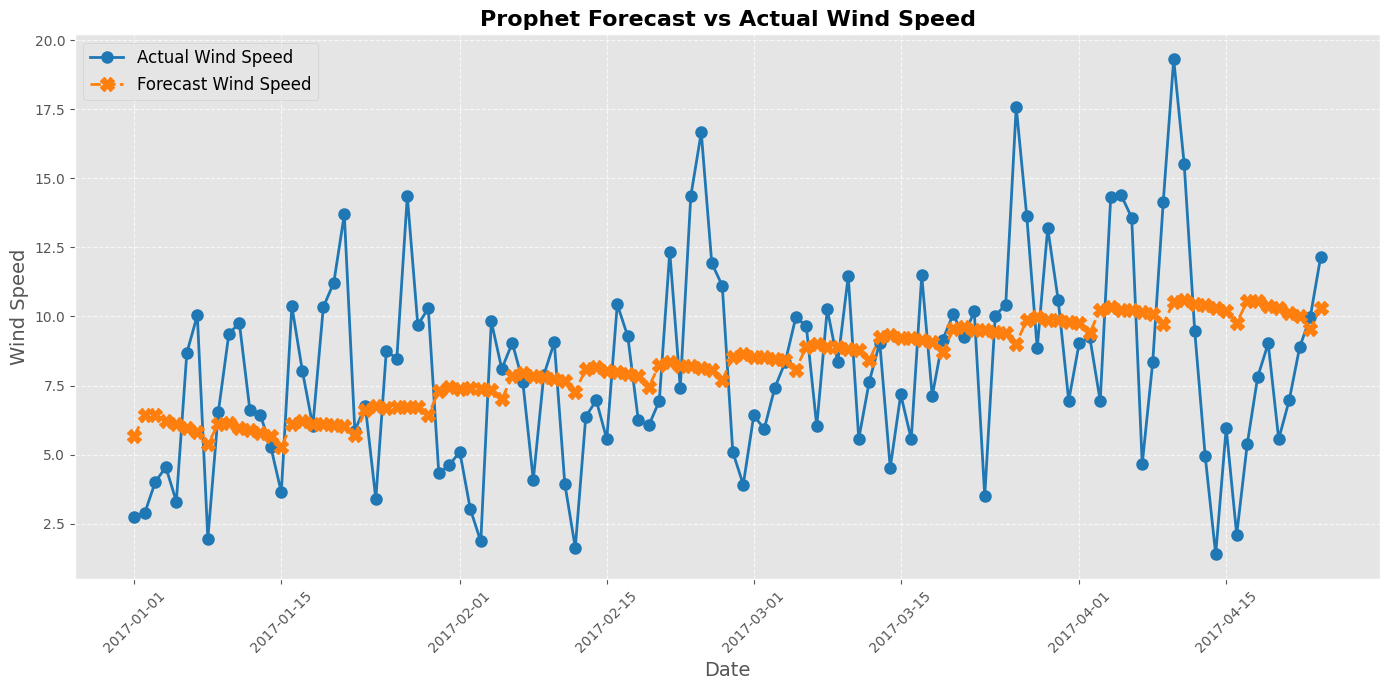

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

prophet_df = train[['date', 'wind_speed']].rename(columns={'date': 'ds', 'wind_speed': 'y'})

model = Prophet()
model.fit(prophet_df)

test_reset = test.reset_index()
test_df = test_reset[['date']].rename(columns={'date': 'ds'})

forecast = model.predict(test_df)

comparison_df = test_reset[['date', 'wind_speed']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')

plt.style.use('ggplot')
plt.figure(figsize=(14, 7))

plt.plot(comparison_df['ds'], comparison_df['wind_speed'], label='Actual Wind Speed',
         marker='o', markersize=8, linestyle='-', linewidth=2, color='#1f77b4')
plt.plot(comparison_df['ds'], comparison_df['yhat'], label='Forecast Wind Speed',
         marker='X', markersize=10, linestyle='--', linewidth=2, color='#ff7f0e')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Wind Speed', fontsize=14)
plt.title('Prophet Forecast vs Actual Wind Speed', fontsize=16, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np


test_reset = test.reset_index()
test_df = test_reset[['date']].rename(columns={'date': 'ds'})
forecast = model.predict(test_df)

# Compare actual vs forecast
comparison_df = test_reset[['date', 'humidity']].rename(columns={'date': 'ds'})
comparison_df['ds'] = pd.to_datetime(comparison_df['ds'])
comparison_df = comparison_df.merge(forecast[['ds', 'yhat']], on='ds')
comparison_df = comparison_df.rename(columns={'humidity': 'y'})

# Calculate metrics
mape = mean_absolute_percentage_error(comparison_df['y'], comparison_df['yhat']) * 100
rmse = np.sqrt(mean_squared_error(comparison_df['y'], comparison_df['yhat']))

print(f"MAPE: {mape:.2f}%")
print(f"RMSE: {rmse:.2f}")


MAPE: 81.90%
RMSE: 52.15
